# Análisis sobre terremotos a nivel mundial

La información ha sido lograda a traves del <b>National Centers for Environmental Information of National Oceanic and Atmospheric Administration (NOAA)</b>.
<img src="https://data.nodc.noaa.gov/css/apps/iso/images/logos/logo_noaa.png" alt="NOAA"> 

La base de datos de terremotos significativos es una lista global de más de 5,700 terremotos desde 2150 aC hasta el presente. Un terremoto significativo se clasifica como uno que cumple al menos uno de los siguientes criterios: <q style="background-color:DodgerBlue;color:white;">muertes causadas, daños moderados (aproximadamente $ 1 millón o más), intensidad 7.5 o mayor, Intensidad de Mercalli Modificada (MMI) X o mayor, o el terremoto generando un tsunami La base de datos proporciona información sobre la fecha y la hora en que se produjo, latitud y longitud, la profundidad focal, la intensidad, la intensidad máxima de MMI y los datos socioeconómicos, como el número total de víctimas, lesiones, casas destruidas y dañadas, así como, estimaciones de daños en dolares</q>. También se proporcionan referencias, geografía política y comentarios adicionales para cada terremoto. Si el terremoto se asoció con un tsunami o erupción volcánica, se marca y se vincula con el evento de tsunami relacionado o una erupción volcánica significativa.
<img src="https://www.ngdc.noaa.gov/hazard/icons/sigeqsm.jpg" alt="Significant Earthquake Database">

La link de descarga de la base de datos es el siguiente: <a href="https://www.ngdc.noaa.gov/nndc/struts/form?t=101650&s=1&d=1">https://www.ngdc.noaa.gov/nndc/struts/form?t=101650&s=1&d=1</a>, la cual tiene como nombre <b style="color:blue;">Significant Earthquake Database</b>.
<p>Esta información se descarga en formato txt, sin embargo, se utilizó un software de Sistema de Información Geográfica (QGIS) para transformar esta a formato geojson, con el fin de poder hacer uso de la libreria <b style="color:red;">GeoPandas</b>. A esta libreria se agregan otras como: <b style="color:red;">Pandas,Numpy, Matplotlib, Seaborn.</b>

In [311]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy import ndimage
from IPython.core.display import HTML
import warnings
warnings.filterwarnings('ignore')

plt.ion()

In [312]:
eq = gpd.GeoDataFrame.from_file("Dataset/earthquakes.geojson")

A continuación, se muestra las columnas que componen esta base de datos:

In [313]:
eq.columns

Index(['I_D', 'FLAG_TSUNAMI', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE',
       'SECOND', 'FOCAL_DEPTH', 'EQ_PRIMARY', 'EQ_MAG_MW', 'EQ_MAG_MS',
       'EQ_MAG_MB', 'EQ_MAG_ML', 'EQ_MAG_MFA', 'EQ_MAG_UNK', 'INTENSITY',
       'COUNTRY', 'STATE', 'LOCATION_NAME', 'LATITUDE', 'LONGITUDE',
       'REGION_CODE', 'DEATHS', 'DEATHS_DESCRIPTION', 'MISSING',
       'MISSING_DESCRIPTION', 'INJURIES', 'INJURIES_DESCRIPTION',
       'DAMAGE_MILLIONS_DOLLARS', 'DAMAGE_DESCRIPTION', 'HOUSES_DESTROYED',
       'HOUSES_DESTROYED_DESCRIPTION', 'HOUSES_DAMAGED',
       'HOUSES_DAMAGED_DESCRIPTION', 'TOTAL_DEATHS',
       'TOTAL_DEATHS_DESCRIPTION', 'TOTAL_MISSING',
       'TOTAL_MISSING_DESCRIPTION', 'TOTAL_INJURIES',
       'TOTAL_INJURIES_DESCRIPTION', 'TOTAL_DAMAGE_MILLIONS_DOLLARS',
       'TOTAL_DAMAGE_DESCRIPTION', 'TOTAL_HOUSES_DESTROYED',
       'TOTAL_HOUSES_DESTROYED_DESCRIPTION', 'TOTAL_HOUSES_DAMAGED',
       'TOTAL_HOUSES_DAMAGED_DESCRIPTION', 'geometry'],
      dtype='object')

A esta base de datos se le aplica un limpieza de columnas que no se tomarán en consideración

In [22]:
eq.drop(['DEATHS_DESCRIPTION', 'MISSING_DESCRIPTION', 'INJURIES_DESCRIPTION', 'DAMAGE_DESCRIPTION', 'HOUSES_DESTROYED_DESCRIPTION', 'HOUSES_DAMAGED_DESCRIPTION',
         'TOTAL_DEATHS_DESCRIPTION', 'TOTAL_MISSING_DESCRIPTION', 'TOTAL_INJURIES_DESCRIPTION', 'TOTAL_DAMAGE_DESCRIPTION', 'TOTAL_HOUSES_DESTROYED_DESCRIPTION', 
         'TOTAL_HOUSES_DAMAGED_DESCRIPTION'], axis=1, inplace=True)

Por consiguiente, algunas de las que si formarán parte de los análisis serán

In [27]:
eq.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6081 entries, 0 to 6080
Data columns (total 36 columns):
I_D                              6081 non-null int64
FLAG_TSUNAMI                     1800 non-null object
YEAR                             6081 non-null int64
MONTH                            5677 non-null float64
DAY                              5525 non-null float64
HOUR                             4054 non-null float64
MINUTE                           3848 non-null float64
SECOND                           4252 non-null object
FOCAL_DEPTH                      3131 non-null float64
EQ_PRIMARY                       4296 non-null float64
EQ_MAG_MW                        1226 non-null float64
EQ_MAG_MS                        2911 non-null float64
EQ_MAG_MB                        1788 non-null float64
EQ_MAG_ML                        180 non-null float64
EQ_MAG_MFA                       14 non-null float64
EQ_MAG_UNK                       772 non-null float64
INTENSITY      

In [28]:
eq.shape

(6081, 36)

Obteniendo así un data frame de 36 columnas y 6081 filas

In [25]:
eq.head()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,DAMAGE_MILLIONS_DOLLARS,HOUSES_DESTROYED,HOUSES_DAMAGED,TOTAL_DEATHS,TOTAL_MISSING,TOTAL_INJURIES,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DAMAGED,geometry
0,1,None,-2150,NaN,NaN,NaN,NaN,,NaN,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (35.5 31.1)
1,3,None,-2000,NaN,NaN,NaN,NaN,None,18.0,7.1,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,POINT (58.2 38)
2,2,Tsu,-2000,NaN,NaN,NaN,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (35.8 35.683)
3,5877,Tsu,-1610,NaN,NaN,NaN,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (25.4 36.4)
4,8,None,-1566,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (35.3 31.5)


Paso siguiente, se asignará la columna país como columna indice

In [245]:
eq = eq.set_index('COUNTRY')

In [250]:
eq.index

Index(['JORDAN', 'TURKMENISTAN', 'SYRIA', 'GREECE', 'ISRAEL', 'ITALY', 'SYRIA',
       'ISRAEL', 'JORDAN', 'ISRAEL',
       ...
       'MOZAMBIQUE', 'ITALY', 'CHINA', 'IRAN', 'POLAND', 'CHILE', 'POLAND',
       'MEXICO', 'INDIA', 'ECUADOR'],
      dtype='object', name='COUNTRY', length=6081)

<h1>Objetivos del estudio</h1>
<p>De esta base de datos interesa análizar información de los últimos 100 años y aspecto tales como: 
<div class="alert alert-info">
<ul><b><li>Localización</b>; analisis por la ubicación del terremoto, país y región </ul><ul><b><li>Temporalidad</b>; analisis por Años, Meses y Horas</ul><ul><b><li>Caracteristicas de los terremotos</b>; se analizan magnitud, intensidad y peligro asociado (Tsunami)</ul><ul>y <b><li>Efectos de estos</b>; se analizan el número de muertos y heridos por terremotos, además de daños en millones de dolares, así como número de casas destruidas o dañadas.</ul>
    </div>

# Análisis de datos sobre terremotos en los ultimos 100 años

Para el analisis de datos sobre terremotos, nos enfocaremos en este estudio en los registros de los ultimos 100 años, por lo cual se realiza un filtro por año que abarca desde el 1918 hasta el 2018.

In [137]:
eq100 = eq.loc[eq.YEAR >= 1918]
eq100.describe()

,I_D,YEAR,MONTH,DAY,HOUR,MINUTE,FOCAL_DEPTH,EQ_PRIMARY,EQ_MAG_MW,EQ_MAG_MS,...,INJURIES,DAMAGE_MILLIONS_DOLLARS,HOUSES_DESTROYED,HOUSES_DAMAGED,TOTAL_DEATHS,TOTAL_MISSING,TOTAL_INJURIES,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DAMAGED
count,3231.000000,3231.000000,3228.000000,3226.000000,3100.000000,3081.000000,2699.000000,2997.000000,1182.000000,1960.000000,...,1100.000000,470.000000,5.770000e+02,4.050000e+02,1099.000000,23.000000,1107.000000,419.000000,5.900000e+02,3.660000e+02
mean,6112.592696,1978.311359,6.539653,15.674830,11.321613,29.059396,38.934791,6.292092,6.488240,6.411837,...,2399.113636,1303.366789,2.148615e+04,2.886529e+04,2027.694268,2103.347826,2646.803975,1993.661790,2.265738e+04,6.764077e+04
std,2190.434900,29.366441,3.467407,8.735704,7.076869,17.376261,67.888559,1.045510,0.925445,0.988563,...,27926.239302,6999.970883,2.296868e+05,2.742684e+05,16888.250262,9030.046645,29232.997111,12993.135568,2.290737e+05,1.097879e+06
min,3104.000000,1918.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.600000,3.600000,2.100000,...,1.000000,0.013000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,0.010000,1.000000e+00,1.000000e+00
25%,4427.500000,1956.000000,4.000000,8.000000,5.000000,14.000000,10.000000,5.500000,5.700000,5.600000,...,10.000000,4.500000,5.000000e+01,7.100000e+01,2.000000,5.500000,10.000000,5.000000,5.000000e+01,7.700000e+01
50%,5487.000000,1983.000000,7.000000,16.000000,11.000000,29.000000,24.000000,6.300000,6.400000,6.500000,...,40.000000,23.350000,4.590000e+02,6.500000e+02,8.000000,21.000000,40.000000,30.000000,4.545000e+02,6.145000e+02
75%,7734.500000,2005.000000,10.000000,23.000000,18.000000,44.000000,36.000000,7.100000,7.200000,7.200000,...,200.000000,208.950000,4.000000e+03,3.500000e+03,60.000000,169.000000,200.000000,300.000000,3.496750e+03,2.800000e+03
max,10393.000000,2019.000000,12.000000,31.000000,23.000000,59.000000,675.000000,9.500000,9.500000,9.100000,...,799000.000000,100000.000000,5.360000e+06,5.360000e+06,316000.000000,43476.000000,799000.000000,220085.456000,5.360000e+06,2.100000e+07


Al realizar un analisis del tipo estadistica descriptiva sobre los datos de los ultimos 100 años se tiene:
<ul>-La cantidad de eventos sismicos con caracter de terremoto registrados han sido 3231</ul><ul>-Estos terremotos han causado 1099 muertes</ul><ul>-Han dejado un total de 1107 heridos</ul><ul>-y el costo economico por daños a sido de 419 millones de dolares</ul>

<h1>Localización</h1>
<p>Aqui se analiza: la ubicación del terremoto, pais y region

<h3>Información geografica de referencia</h3>
<p>Dada la necesidad de realizar posibles analisis a nivel continental, país, región, etc; se obtó por incluir una base de datos, en formato de objeto espacial (poligonos), del planeta el cual se obtuvo a traves del sitio <a href="https://www.naturalearthdata.com/">https://www.naturalearthdata.com/</a>, sección <b>1:110m Cultural Vectors</b>, archivo <b>Admin 0 – Countries</b>.
<p>La base de datos de dicho archivo posee las siguientes columnas:

In [283]:
wd = gpd.read_file("Dataset/world.geojson")

In [285]:
wd.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [286]:
wd.drop(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL','ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'REGION_WB', 'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI',
       'NAME_HU', 'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL',
       'NAME_PL', 'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI',
       'NAME_ZH',], axis=1, inplace=True)

In [287]:
wd.head()

,TYPE,ADMIN,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Sovereign country,Fiji,920938,11,8374.0,2017,2007,2016,6. Developing region,4. Lower middle income,Oceania,Oceania,Melanesia,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,Sovereign country,United Republic of Tanzania,53950935,16,150600.0,2017,2002,2016,7. Least developed region,5. Low income,Africa,Africa,Eastern Africa,"(POLYGON ((33.90371119710453 -0.95, 34.07262 -..."
2,Indeterminate,Western Sahara,603253,11,906.5,2017,-99,2007,7. Least developed region,5. Low income,Africa,Africa,Northern Africa,(POLYGON ((-8.665589565454809 27.6564258895923...
3,Sovereign country,Canada,35623680,15,1674000.0,2017,2011,2016,1. Developed region: G7,1. High income: OECD,North America,Americas,Northern America,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,Country,United States of America,326625791,17,18560000.0,2017,2010,2016,1. Developed region: G7,1. High income: OECD,North America,Americas,Northern America,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


In [288]:
wd['ADMIN'] = wd['ADMIN'].str.upper()

In [289]:
wd = wd.set_index('ADMIN')

In [290]:
wd.index

Index(['FIJI', 'UNITED REPUBLIC OF TANZANIA', 'WESTERN SAHARA', 'CANADA',
       'UNITED STATES OF AMERICA', 'KAZAKHSTAN', 'UZBEKISTAN',
       'PAPUA NEW GUINEA', 'INDONESIA', 'ARGENTINA',
       ...
       'SOMALILAND', 'UGANDA', 'RWANDA', 'BOSNIA AND HERZEGOVINA', 'MACEDONIA',
       'REPUBLIC OF SERBIA', 'MONTENEGRO', 'KOSOVO', 'TRINIDAD AND TOBAGO',
       'SOUTH SUDAN'],
      dtype='object', name='ADMIN', length=177)

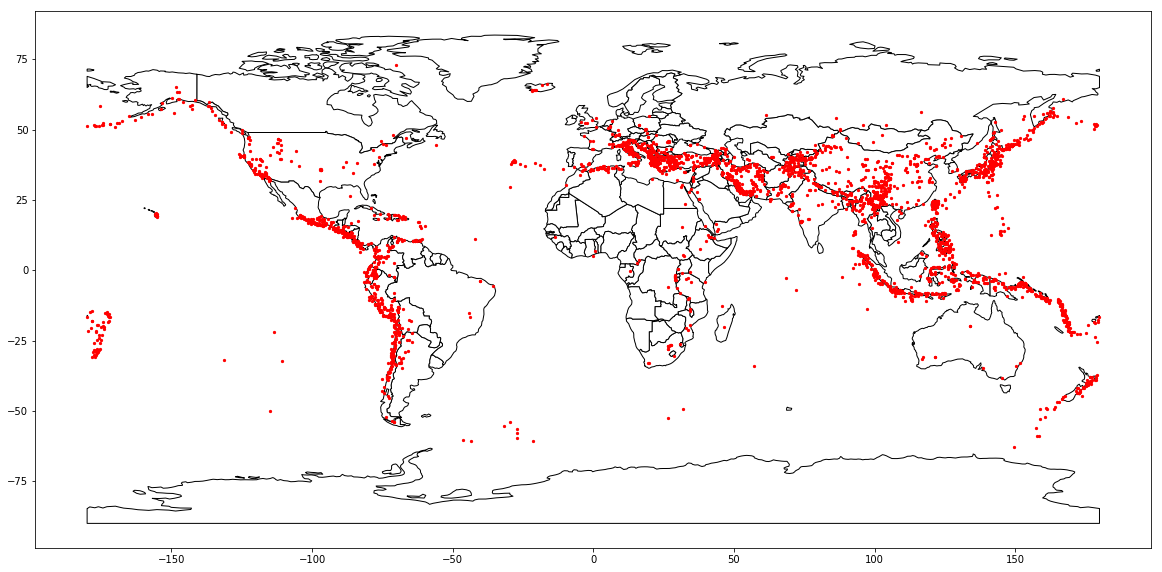

In [202]:
b1 = wd.plot(color='white', edgecolor='black', figsize=(20, 20))
eq100.plot(ax=b1, marker='o', color='red', markersize=5);

<h2>Distribucion de las localizaciones de terremotos por continente</h2>
<p>Los continentes:

In [291]:
wd['CONTINENT'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

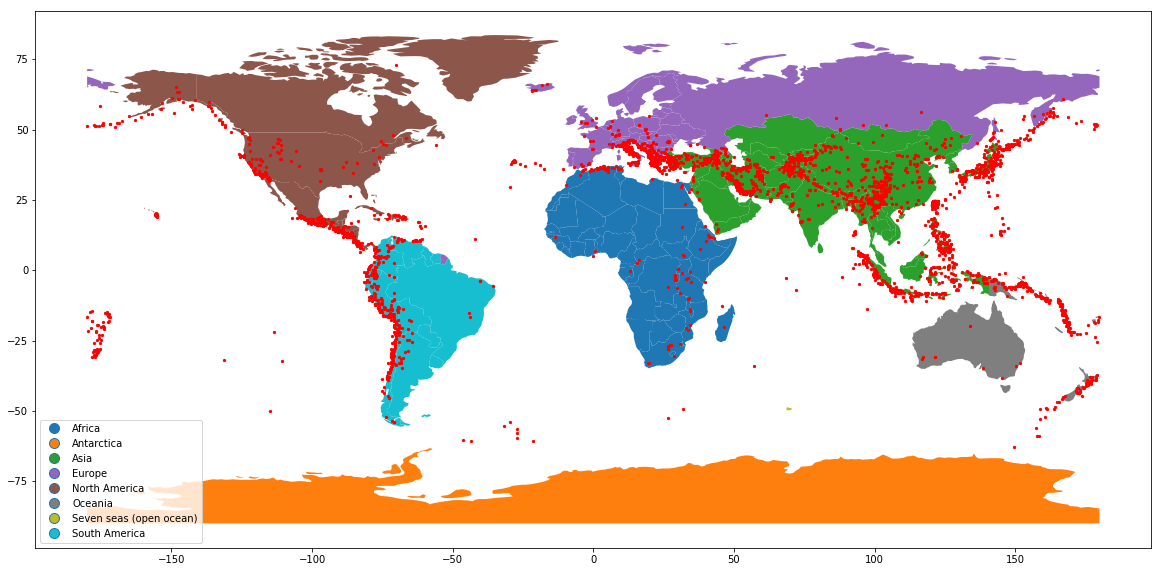

In [304]:
wdc = wd.plot(legend='CONTINENT', column='CONTINENT', figsize=(20, 20))
eq100.plot(ax=wdc, marker='o', color='red', markersize=5);

In [14]:
wd.groupby('CONTINENT')['GDP_PER_CAP'].sum()

CONTINENT
Africa                     0.267293
Antarctica                 0.200000
Asia                       1.075919
Europe                     1.314298
North America              0.376824
Oceania                    0.146081
Seven seas (open ocean)    0.114286
South America              0.270031
Name: GDP_PER_CAP, dtype: float64

<h2>Terremotos registrados por país durante los últimos 100 años</h2>
<p>Al analizar los datos por país se tiene que

In [214]:
eq.COUNTRY.value_counts().head(20)

CHINA               594
JAPAN               403
IRAN                378
INDONESIA           375
ITALY               326
TURKEY              321
USA                 260
GREECE              260
PHILIPPINES         210
MEXICO              199
CHILE               194
PERU                180
RUSSIA              149
PAPUA NEW GUINEA     95
TAIWAN               94
INDIA                92
COLOMBIA             77
VENEZUELA            66
NEW ZEALAND          65
ECUADOR              64
Name: COUNTRY, dtype: int64

China es el pais que presenta un mayor número de terremotos en estos 100 años, en total son 594, seguido de Japón con 403 terremotos, y en el rango de 300 a 400 terremotos estan: Iran, Indonesia, Italia, entre otros

Si contrastastamos esos datos en relacion al la población per capita se observa que

In [294]:
wd['GDP_PER_CAP'] = wd.GDP_MD_EST / wd.POP_EST

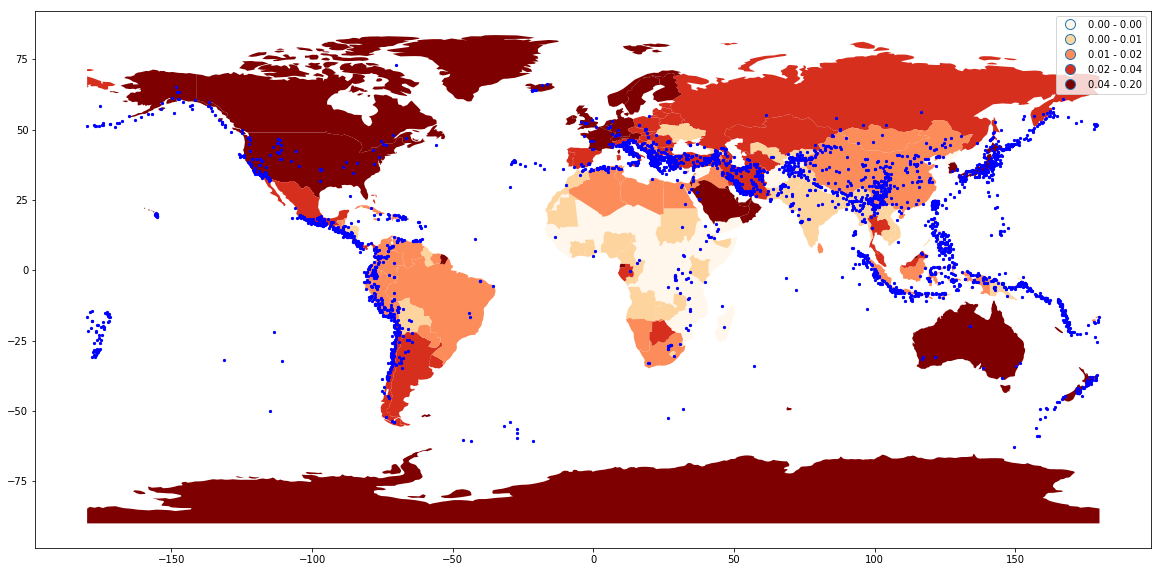

In [306]:
pob = wd.plot(legend='GDP_PER_CAP', column='GDP_PER_CAP', cmap='OrRd', scheme='quantiles', figsize=(20, 20))
eq100.plot(ax=pob, marker='o', color='blue', markersize=5);

<h2>Lugares en los que se dieron terremotos</h2>
<p>En el siguiente analisis se contemplan los sitios en que ocurrieron los terremotos.

In [213]:
eq.LOCATION_NAME.value_counts().head(20)

CHINA:  YUNNAN PROVINCE       68
TURKEY                        49
CHINA:  SICHUAN PROVINCE      44
RUSSIA:  KURIL ISLANDS        39
BALKANS NW:  CROATIA          33
SOLOMON ISLANDS               33
VANUATU ISLANDS               33
PERU                          28
MEXICO:  OAXACA               27
SWITZERLAND                   27
CHINA:  GANSU PROVINCE        27
TAIWAN                        25
ITALY:  N                     25
ITALY:  CENTRAL               24
CHILE:  NORTHERN              23
INDONESIA:  BANDA SEA         23
TURKEY:  ANTAKYA (ANTIOCH)    22
CHILE                         22
JAPAN:  SANRIKU               21
CHINA:  SHANXI PROVINCE       20
Name: LOCATION_NAME, dtype: int64

En este punto puede resultar interesante estudiar la relación de estos puntos donde ocurrieron terremotos con el dato de las placas continentales, ya que estas estan asociadas a este tipo de eventos. Por tanto, se hara uso de un archivo espacial en que podamos ver representados los registros de terremotos vs las placas tectonicas.

In [59]:
url = "https://raw.githubusercontent.com/fraxen/tectonicplates/master/GeoJSON/PB2002_plates.json"
pc = gpd.read_file(url)
pc.head()

,LAYER,Code,PlateName,geometry
0,plate,AF,Africa,"POLYGON ((-0.4379 -54.8518, -0.914655 -54.4535..."
1,plate,AN,Antarctica,"POLYGON ((180 -65.749397, 180 -90, -180 -90, -..."
2,plate,SO,Somalia,"POLYGON ((32.1258 -46.9998, 32.1252 -46.9975, ..."
3,plate,IN,India,"POLYGON ((56.2652 14.6232, 57.0015 14.6601, 57..."
4,plate,AU,Australia,"(POLYGON ((-180 -32.30415, -180 -15.620711, -1..."


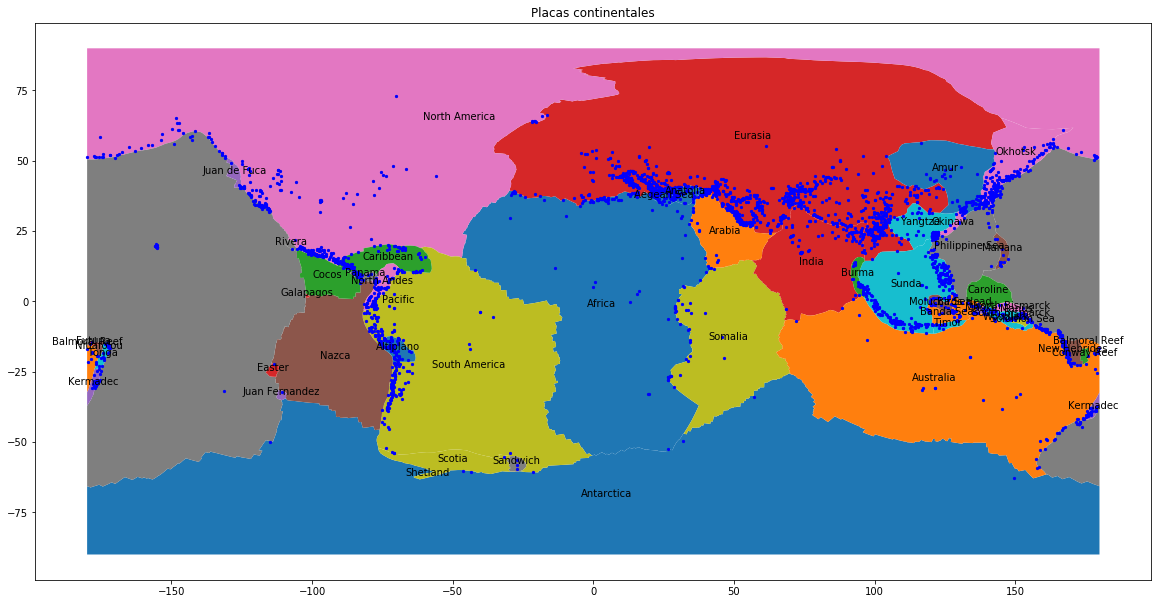

In [308]:
pcl = pc.plot(column='PlateName', figsize=(20, 20))
eq100.plot(ax=pcl, marker='o', color='blue', markersize=5);
plt.title('Placas continentales')
pc.apply(lambda x: pcl.annotate(s=x.PlateName, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

<h1>Temporalidad</h1>
<p>En este apartado se analizan los datos de terremotos por información temporal: Año, Mes y Hora

<h2>En años</h2>

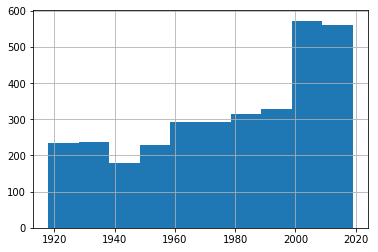

In [218]:
eq100['YEAR'].hist()

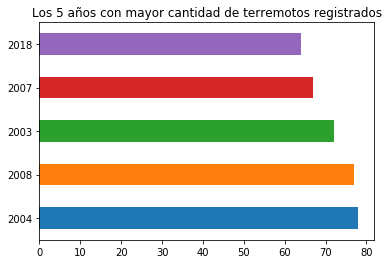

In [193]:
eq100['YEAR'].value_counts(sort=True).head().plot.barh(title='Los 5 años con mayor cantidad de terremotos registrados')

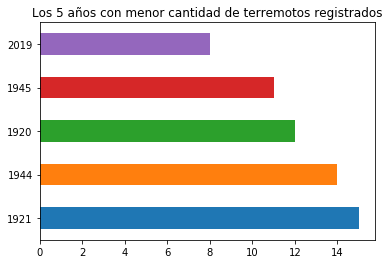

In [194]:
eq100['YEAR'].value_counts(sort=True).tail().plot.barh(title='Los 5 años con menor cantidad de terremotos registrados')

<h2>En meses</h2>
<p>El siguiente gráfico muestra cuales han sido los meses más activos y menos activos en cuanto a terremotos

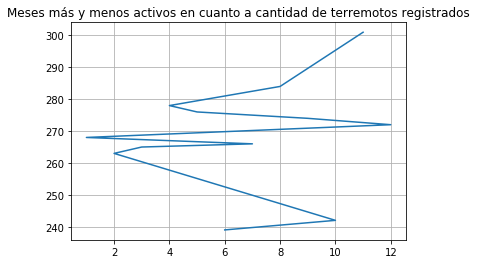

In [201]:
eq100['MONTH'].value_counts(sort=True).plot(title='Meses más y menos activos en cuanto a cantidad de terremotos registrados', grid=True)

<h1>Caracteristicas de los terremotos</h1>
<p>Dentro de esta categoria tenemos: magnitud, intensidad y peligro asociado (Tsunami)

<h2>Magnitudes</h2>

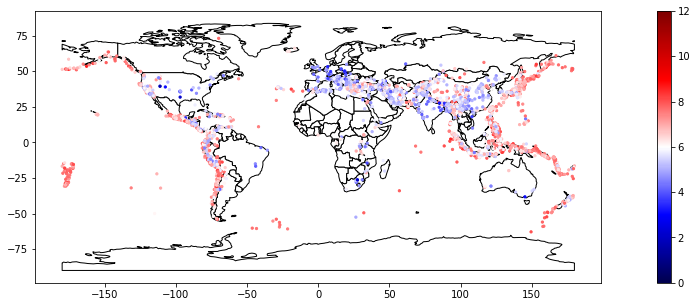

In [178]:
b4 = wd.plot(color='white', edgecolor='black', figsize=(20, 5))
eq100.plot(ax=b4, figsize=(20, 5), legend=True, column='EQ_PRIMARY',cmap='seismic', vmin='0.00', vmax='12.00', marker='o', markersize=5);

<h2>Intensidades registradas en terremotos</h2>
<p>Uno de los aspectos más importantes al momento de estudiar los terremotos es la intensidad que este registro.
<p>Las intensidades responden a las siguientes categorias

In [66]:
eq100['INTENSITY'].unique()

array([nan,  7., 10.,  9.,  8., 12., 11.,  5.,  3.,  6.,  4.,  2.])

Con base de la información del data frame sobre terremotos se puede aplicar estadistica descritiva al dato sobre intensidad, logrando asi conocer la cantidad de registros con es este dato, asi como el promedio, la disviación estandar, valor minimo, percentiles, y el valor maximo de intensidad registrado por la NOAA en su base de datos.

In [67]:
intens = eq100['INTENSITY']
intens.describe()

count    1240.000000
mean        7.605645
std         1.949351
min         2.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        12.000000
Name: INTENSITY, dtype: float64

De este modo se puede apreciar que de un total 1240 eventos registrados con el dato de intensidad sismica, el promedio de intensidad es de 7.6 , siendo el minimo registrado 2.0 , y el maximo 12.0 .

Si se visualiza en un mapa cual es la distribución espacial de los eventos sismicos con mayores intensidades (los de escala 10 ) se nota un patrón que se extiende, de forma horizontal, desde europa abarcando todo el continente asiatico, considiendo en gran medida con el borde de subducción de la placa eurasia. 

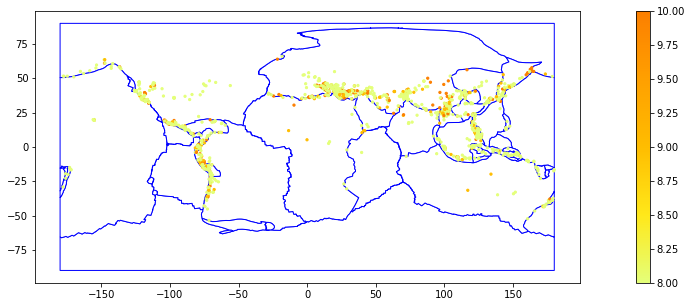

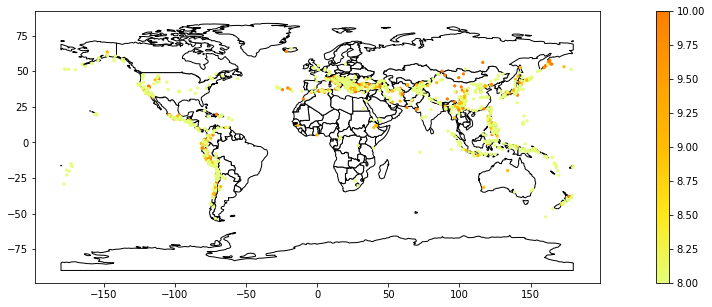

In [68]:
b2 = pc.plot(color='white', edgecolor='blue', figsize=(20, 5))
b3 = wd.plot(color='white', edgecolor='black', figsize=(20, 5))
eq100.plot(ax=b2, figsize=(20, 5), legend='INTENSITY', column='INTENSITY',cmap='Wistia', vmin='8.00', vmax='10.00', marker='o', markersize=5)
eq100.plot(ax=b3, figsize=(20, 5), legend='INTENSITY', column='INTENSITY',cmap='Wistia', vmin='8.00', vmax='10.00', marker='o', markersize=5);

Ahora bien, al analizar que intensidades han sido las más frecuentes en los últimos 100 años, se tiene que

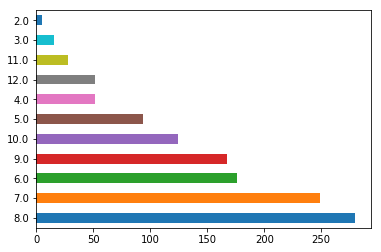

In [69]:
eq100['INTENSITY'].value_counts(sort=True).plot.barh()

La mayor cantidad de terremotos ocurridos han sido de intensidad 8.0 , seguido por los de intensidad 7.0 .

Al analizar el dato de intensidad de 8.0  con otras variables se tiene que

In [179]:
intens_8y7 = eq100[eq100.INTENSITY.isin([8.0, 7.0])]
intens_8y7.agg(['count', 'min', 'max', 'mean'])

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,DAMAGE_MILLIONS_DOLLARS,HOUSES_DESTROYED,HOUSES_DAMAGED,TOTAL_DEATHS,TOTAL_MISSING,TOTAL_INJURIES,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DAMAGED,geometry
count,529.00000,126.0,529.000000,527.000000,527.000000,499.000000,496.00,496.0,394.000000,501.000000,...,138.000000,104.000000,52.000000,202.00000,5.0,196.000000,124.000000,108.000000,42.000000,529.0
min,3104.00000,NaN,1918.000000,1.000000,1.000000,0.000000,0.00,NaN,0.000000,4.100000,...,0.100000,1.000000,2.000000,1.00000,8.0,1.000000,0.100000,1.000000,2.000000,NaN
max,10386.00000,NaN,2018.000000,12.000000,31.000000,23.000000,59.00,NaN,240.000000,9.000000,...,20000.000000,299588.000000,269107.000000,76213.00000,1309.0,146599.000000,20000.000000,299588.000000,269107.000000,NaN
mean,5621.89225,NaN,1970.678639,6.696395,16.301708,11.360721,29.75,NaN,32.324873,6.245509,...,510.620174,11603.365385,16936.865385,936.09901,366.0,2155.015306,598.060202,11263.305556,19965.690476,NaN


In [227]:
intens_8y7.groupby('COUNTRY').INTENSITY.mean().tail(10).sort_values(ascending=False)

COUNTRY
YEMEN            8.000000
UK               8.000000
TUNISIA          8.000000
TURKEY           7.750000
USA              7.509804
VENEZUELA        7.500000
VANUATU          7.250000
USA TERRITORY    7.166667
UZBEKISTAN       7.000000
UKRAINE          7.000000
Name: INTENSITY, dtype: float64

In [181]:
intens_11y12 = eq100[eq100.INTENSITY.isin([12.0, 11.0])]
intens_11y12.agg(['count', 'min', 'max', 'mean'])

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,DAMAGE_MILLIONS_DOLLARS,HOUSES_DESTROYED,HOUSES_DAMAGED,TOTAL_DEATHS,TOTAL_MISSING,TOTAL_INJURIES,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DAMAGED,geometry
count,79.000000,10.0,79.000000,79.000000,79.000000,75.000000,64.00000,79,26.000000,32.0,...,10.0,6.000000,0.0,18.000000,0.0,7.000000,11.000000,5.0,0.0,79.0
min,3145.000000,NaN,1919.000000,1.000000,1.000000,0.000000,0.00000,,1.000000,5.9,...,5.0,980.000000,NaN,3.000000,NaN,524.000000,0.100000,20000.0,NaN,NaN
max,6510.000000,NaN,1995.000000,12.000000,31.000000,23.000000,59.00000,59.9,130.000000,9.5,...,100000.0,200000.000000,NaN,242769.000000,NaN,799000.000000,100000.000000,200000.0,NaN,NaN
mean,3672.658228,NaN,1938.025316,7.139241,17.126582,11.786667,30.34375,NaN,33.192308,7.3,...,10724.1,57712.666667,NaN,30695.388889,NaN,121631.428571,9748.872727,69059.2,NaN,NaN


In [184]:
intens_11y12.groupby('COUNTRY').INTENSITY.mean().tail().sort_values(ascending=False)

COUNTRY
SLOVENIA    12.0
TURKEY      11.5
USA         11.4
RUSSIA      11.0
PERU        11.0
Name: INTENSITY, dtype: float64

<h2>Peligro asociado (Tsunamis)</h2>
<p>En este punto nos interesa saber cuantos y cuales terremotos llevaron al desencadenamiento de Tsunamis, asi como sus consecuencias.

In [229]:
eq100.FLAG_TSUNAMI.count()

871

In [239]:
eq100.groupby('COUNTRY')['FLAG_TSUNAMI'].count().sort_values(ascending=False).head(10)

COUNTRY
JAPAN               142
INDONESIA            83
CHILE                72
RUSSIA               67
USA                  59
PAPUA NEW GUINEA     45
PHILIPPINES          43
SOLOMON ISLANDS      39
GREECE               31
MEXICO               27
Name: FLAG_TSUNAMI, dtype: int64

<h1>Efectos de los terremotos</h1>
<p>En esta categoria tenemos: número de muertos por terremotos, número de heridos, daños en millones de dólares y número de casas destruidas o dañadas. 

<h2>Muertes causadas por terremotos</h2>
<p>Por otro lado, si se analizan las cantidad de muertes por terremotos en los ultimos 100 años, se analiza y contrasta este dato por pais en el siguiente grafico 

Text(0.5, 1.0, 'Paises con mayor número de muertos por terremotos en los ultimos 100 años')

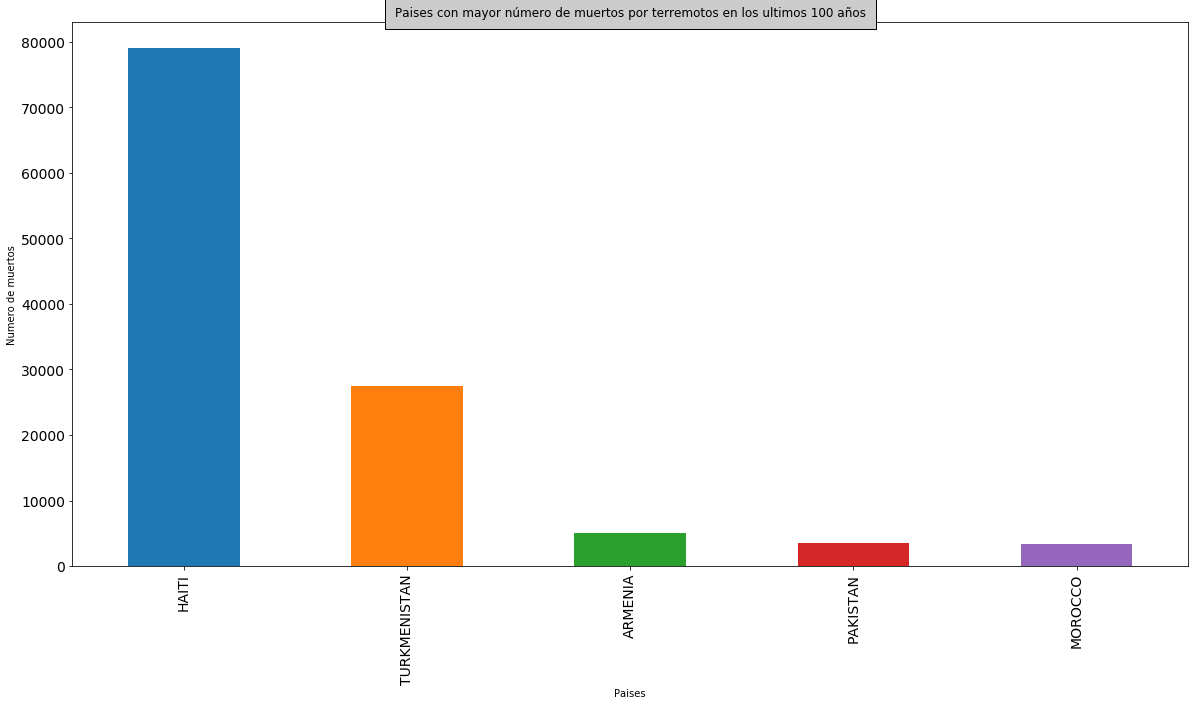

In [169]:
eq100.groupby('COUNTRY')['TOTAL_DEATHS'].aggregate(lambda x: x.sum() / len(x)).sort_values(ascending=False).head().plot(figsize=(20, 10),kind='bar', fontsize=14)
plt.xlabel('Paises')
plt.ylabel('Numero de muertos')
plt.title('Paises con mayor número de muertos por terremotos en los ultimos 100 años', bbox={'facecolor':'0.8', 'pad':10})

Numero de Muertos por terremotos según años

Text(0.5, 1.0, 'Años en que se registro mayor número de muertos por terremotos en los ultimos 100 años')

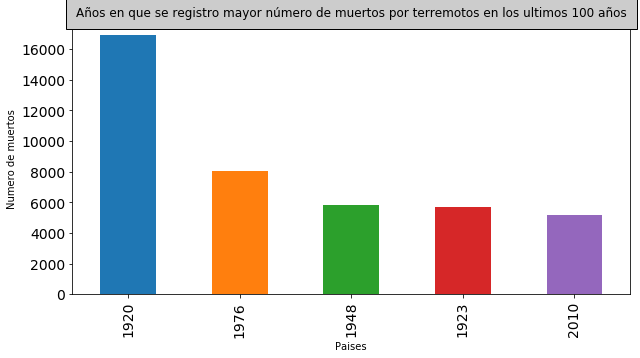

In [310]:
eq100.groupby('YEAR')['TOTAL_DEATHS'].aggregate(lambda x: x.sum() / len(x)).sort_values(ascending=False).head().plot(figsize=(10, 5),kind='bar', fontsize=14)
plt.xlabel('Paises')
plt.ylabel('Numero de muertos')
plt.title('Años en que se registro mayor número de muertos por terremotos en los ultimos 100 años', bbox={'facecolor':'0.8', 'pad':10})